# Synthesizer | Privacy and Accuracy

**Objective:**
- Demonstrate how Synthesizer maintains both privacy of data and accurate synthetic data distributions

**Observation:**
- As desired_conviction is increased, the accuracy of generated data increases. And while privacy decreases, it is maintained over reasonable ranges of conviction.

In [1]:
from pathlib import Path

from IPython.display import (
    display,
    Markdown,
)
import pandas as pd
import seaborn as sns
import os

from howso.synthesizer import Synthesizer
from howso.utilities import infer_feature_attributes
from howso.validator import Validator

os.environ["LANG"] = "en_US.UTF-8"
os.environ["LC_ALL"] = "en_US.UTF-8"


In [2]:
col_type_mapping = {
    'nih_record_id': 'string', 'nih_race': 'Int64', 'nih_ethnicity': 'Int64',
    'nih_age': 'Int64', 'nih_sex': 'Int64', 'nih_zip': 'string', 'nih_insurance': 'Int64',
    'nih_vaping_yn': 'Int64', 'nih_nicotine_yn': 'Int64', 'nih_alcohol_yn': 'Int64',
    'nih_asthma': 'Int64', 'nih_cancer': 'Int64', 'nih_cardiovascular_disease': 'Int64',
    'nih_chronic_kidney_disease': 'Int64', 'nih_chronic_lung_disease': 'Int64',
    'nih_diabetes': 'Int64', 'nih_hypertension': 'Int64',
    'nih_immunosuppressive_condition': 'Int64', 'nih_serious_mental_illness': 'Int64',
    'nih_sickle_cell_disease': 'Int64', 'nih_pregnancy': 'Int64', 'nih_height': 'Int64',
    'nih_weight': 'Int64', 'patient_data_date': 'string',
    'patient_covid_test_complete': 'string', 'covid_test_result': 'Int64',
    'covid_test_type': 'Int64', 'patient_stay_length': 'Int64',
    'patient_ventilator': 'Int64', 'patient_icu': 'Int64', 'patient_remdesivir_use': 'Int64',
    'patient_mortality': 'Int64', 'country': 'Int64'
}
print(f'total number of columns being mapped: {len(col_type_mapping)}')

data_path = Path("/home", "sagemaker-user", "phs002525", "rad_015_941-01_deidentified_clinicaldata_DATA_transformcopy_v1_processed.csv")
df = pd.read_csv(data_path, dtype=col_type_mapping)
df = df.reset_index(drop=True)
print(df.columns)
print(f'total number of rows: {len(df)}')

# for model comparison for covid_test_result prediction, nulls from target feature should be removed and all-null columns should be removed as well
target_feature = 'patient_stay_length'
df = df.dropna(subset=[target_feature])
print(f'after removing null rows, df.shape: {df.shape}')
null_only_cols = df.columns[df.isna().all()].tolist()
print(null_only_cols)
df = df.drop(columns=null_only_cols)
df = df.reset_index(drop=True)
print(df.shape)
pd.set_option('display.max_columns', None)
df.describe()

total number of columns being mapped: 33
Index(['nih_race', 'nih_ethnicity', 'nih_age', 'nih_sex', 'nih_zip',
       'nih_insurance', 'nih_vaping_yn', 'nih_nicotine_yn', 'nih_alcohol_yn',
       'nih_asthma', 'nih_cancer', 'nih_cardiovascular_disease',
       'nih_chronic_kidney_disease', 'nih_chronic_lung_disease',
       'nih_diabetes', 'nih_hypertension', 'nih_immunosuppressive_condition',
       'nih_serious_mental_illness', 'nih_sickle_cell_disease',
       'nih_pregnancy', 'nih_height', 'nih_weight', 'patient_stay_length',
       'patient_ventilator', 'patient_icu', 'patient_remdesivir_use',
       'patient_mortality', 'country'],
      dtype='object')
total number of rows: 7285
after removing null rows, df.shape: (7285, 28)
[]
(7285, 28)


,nih_race,nih_ethnicity,nih_age,nih_sex,nih_insurance,nih_vaping_yn,nih_nicotine_yn,nih_alcohol_yn,nih_asthma,nih_cancer,nih_cardiovascular_disease,nih_chronic_kidney_disease,nih_chronic_lung_disease,nih_diabetes,nih_hypertension,nih_immunosuppressive_condition,nih_serious_mental_illness,nih_sickle_cell_disease,nih_pregnancy,nih_height,nih_weight,patient_stay_length,patient_ventilator,patient_icu,patient_remdesivir_use,patient_mortality,country
count,7134.0,7135.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,5706.0,5711.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0
mean,4.455985,0.606167,58.128483,0.495813,1.231846,0.11105,0.348936,0.047632,0.133288,0.380782,0.727385,0.441592,0.26685,0.352231,0.617296,0.026356,0.21757,0.010158,0.0,66.067648,180.74838,6.755388,0.087165,0.141112,0.250789,0.096088,0.05779
std,0.968281,0.488633,18.123144,1.225592,0.42204,0.314216,0.476666,0.213001,0.339909,0.485613,0.445335,0.496611,0.442344,0.477698,0.48608,0.160201,0.412622,0.10028,0.0,3.93679,48.240055,12.667603,0.282097,0.348161,0.433497,0.294732,0.869954
min,1.0,0.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,0.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.0,1.0,59.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,174.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,5.0,1.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,69.0,205.0,8.0,0.0,0.0,1.0,0.0,0.0
max,6.0,1.0,90.0,96.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,80.0,500.0,151.0,1.0,1.0,1.0,1.0,18.0


In [3]:
continuous_feats = ['nih_age', 'nih_height', 'nih_weight', 'patient_stay_length']
features = infer_feature_attributes(
    df,
    infer_bounds=True,
    tight_bounds=continuous_feats,
    types={"continuous": continuous_feats},
    dependent_features={
        "nih_race": ["nih_sickle_cell_disease", ],
        "nih_sex": ["nih_pregnancy", ],
    }
)

subtype_map = {
    # feature: subtype
    "country": "int-id",
    "nih_zip": "int-id"
}

for feature, subtype in subtype_map.items():
    features[feature]["subtype"] = subtype

for f_name in features.get_names(types=("continuous")):
    if f_name not in continuous_feats:
        print(f'changing inferred continuous feature: {f_name} to nominal')
        features[f_name]["type"] = "nominal"

for f_name in features.get_names(types=("nominal", "ordinal")):
    if f_name not in subtype_map:
        features[f_name]["non_sensitive"] = True

features[target_feature]["bounds"] = {'allow_null': False, 'min': df[target_feature].min(), 'max': df[target_feature].max()}

features.to_dataframe()

type decimal_places     bounds        \
                                                           allow_null   min   
nih_race                            nominal            0.0       True   NaN   
nih_ethnicity                       nominal            0.0       True   NaN   
nih_age                          continuous            0.0       True  21.0   
nih_sex                             nominal            0.0       True   NaN   
nih_zip                             nominal            NaN       True   NaN   
nih_insurance                       nominal            0.0       True   NaN   
nih_vaping_yn                       nominal            0.0       True   NaN   
nih_nicotine_yn                     nominal            0.0       True   NaN   
nih_alcohol_yn                      nominal            0.0       True   NaN   
nih_asthma                          nominal            0.0       True   NaN   
nih_cancer                          nominal            0.0       True   NaN   
nih_cardiovascular_disease          nominal            0.0       True   NaN   
nih_chronic_kidney_disease          nominal            0.0       True   NaN   
nih_chronic_lung_disease            nominal            0.0       True   NaN   
nih_diabetes                        nominal            0.0       True   NaN   
nih_hypertension                    nominal            0.0       True   NaN   
nih_immunosuppressive_condition     nominal            0.0       True   NaN   
nih_serious_mental_illness          nominal            0.0       True   NaN   
nih_sickle_cell_disease             nominal            0.0       True   NaN   
nih_pregnancy                       nominal            0.0       True   NaN   
nih_height                       continuous            0.0       True  48.0   
nih_weight                       continuous            0.0       True  79.0   
patient_stay_length              continuous            0.0      False   0.0   
patient_ventilator                  nominal            0.0       True   NaN   
patient_icu                         nominal            0.0       True   NaN   
patient_remdesivir_use              nominal            0.0       True   NaN   
patient_mortality                   nominal            0.0       True   NaN   
country                             nominal            0.0       True   NaN   

                                                                 data_type  \
                                   max observed_min observed_max             
nih_race                           NaN          NaN          NaN    number   
nih_ethnicity                      NaN          NaN          NaN    number   
nih_age                           90.0         21.0         90.0    number   
nih_sex                            NaN          NaN          NaN    number   
nih_zip                            NaN          NaN          NaN    string   
nih_insurance                      NaN          NaN          NaN    number   
nih_vaping_yn                      NaN          NaN          NaN    number   
nih_nicotine_yn                    NaN          NaN          NaN    number   
nih_alcohol_yn                     NaN          NaN          NaN    number   
nih_asthma                         NaN          NaN          NaN    number   
nih_cancer                         NaN          NaN          NaN    number   
nih_cardiovascular_disease         NaN          NaN          NaN    number   
nih_chronic_kidney_disease         NaN          NaN          NaN    number   
nih_chronic_lung_disease           NaN          NaN          NaN    number   
nih_diabetes                       NaN          NaN          NaN    number   
nih_hypertension                   NaN          NaN          NaN    number   
nih_immunosuppressive_condition    NaN          NaN          NaN    number   
nih_serious_mental_illness         NaN          NaN          NaN    number   
nih_sickle_cell_disease            NaN          NaN          NaN    number   
nih_pregnancy                 

# Run Synthesizer for different Desired Convictions
- Run Synthesizer for convictions = [0.1, 0.5, 1, 3, 5, 10, 25]

`Note:` For privacy preservation, privacy_override should be set to False and desired_conviction should be less than or equal to 5. Setting privacy_override=True and desired_conviction > 5 should only be considered for analytical / experimental use only.

`Note:` Setting desired_conviction > 10 will result in fewer outliers, putting emphasis on non-outliers and the synthesized data may be more extreme.


In [ ]:
with Synthesizer(privacy_override=True) as s:
    print(s.synthesize_cases.__doc__)

In [4]:
desired_conviction_list = [0.1, 0.5, 1, 3, 5, 10, 25]
hyperparameters = None
synthed_dfs = []
with Synthesizer(privacy_override=True, use_id_privacy=False) as s:
    s.train(df, features=features)
    # hyperparameters = s.hyperparams
    hyperparams = s.cl.get_params(s.trainee.id)

    for desired_conviction in desired_conviction_list:
        # Train the given dataset
        gen_df = s.synthesize_cases(
            n_samples=df.shape[0],
            desired_conviction=desired_conviction,
            generate_new_cases='no'
        )
        synthed_dfs.append(gen_df)

Version 50.3.0 of Howso Engine™ is available. You are using version 50.2.1.


# Audit Results with Validator

In [5]:
gen_df

,nih_race,nih_ethnicity,nih_age,nih_sex,nih_zip,nih_insurance,nih_vaping_yn,nih_nicotine_yn,nih_alcohol_yn,nih_asthma,nih_cancer,nih_cardiovascular_disease,nih_chronic_kidney_disease,nih_chronic_lung_disease,nih_diabetes,nih_hypertension,nih_immunosuppressive_condition,nih_serious_mental_illness,nih_sickle_cell_disease,nih_pregnancy,nih_height,nih_weight,patient_stay_length,patient_ventilator,patient_icu,patient_remdesivir_use,patient_mortality,country
0,5,1,41,1,5878952782589724934,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,69,174,1,0,0,0,0,7220238322557980819
1,4,0,30,1,3478972529501512832,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,73,150,0,0,0,0,0,7220238322557980819
2,3,1,82,0,5878952782589724934,2,0,1,0,0,1,1,1,0,0,1,0,1,0,0,65,182,33,1,1,0,1,7220238322557980819
3,5,1,65,1,5878952782589724934,2,0,1,0,1,0,1,1,1,1,1,0,1,0,0,64,272,10,0,0,1,0,7220238322557980819
4,3,0,41,1,5878952782589724934,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,<NA>,<NA>,0,0,0,0,0,7220238322557980819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,3,1,69,1,5878952782589724934,2,0,1,0,0,0,1,1,0,0,1,0,1,0,0,69,177,13,0,0,1,0,7220238322557980819
7281,3,0,58,0,5878952782589724934,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,150,3,0,0,1,0,7220238322557980819
7282,5,0,46,1,5878952782589724934,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,71,219,3,0,1,0,0,7220238322557980819
7283,5,0,46,1,3478972529501512832,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,71,255,4,0,0,1,0,7220238322557980819


In [6]:
print(gen_df.shape, gen_df[target_feature].dtype)
print(gen_df[target_feature].unique())

(7285, 28) int64
[  1   0  33  10  24  15  36  37   6   4  22   9   8  18  35   2   7   3
  11  46  14   5  16  29  30  23  38  31  13  34  51  12  65  19  27  43
  25  39  97  21  47  28  49  45  26  59  71  42  58  66  17  48 102  77
  20  40  57  41  32  54  62  70  63  64  60  93  50  96  89 101  72  52
  56 151  55 100  44  69  74 105  81]


In [7]:
desirabilities = []

for desired_conviction, synthed_df in zip(desired_conviction_list, synthed_dfs):
    synthed_df[target_feature] = synthed_df[target_feature].astype(int)
    display(Markdown(f"## `desired_conviction={desired_conviction}`"))
    with Validator(df, synthed_df, features=features, hyperparameters=hyperparams) as val:
        result = val.run_metrics(['AnonymityPreservation', 'DescriptiveStatistics', 'ModelComparison'], action_features=[target_feature])
        desirabilities.append(result.overall_desirability)
    

## `desired_conviction=0.1`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=4.619
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=2.48
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=0.256
Run finished with overall_desirability=1.431


## `desired_conviction=0.5`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run
AnonymityPreservation       : Run completed with desirability=3.206
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=2.747
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=1.876
Run finished with overall_desirability=2.547


## `desired_conviction=1`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run


/home/sagemaker-user/howso-standalone/venv/lib/python3.12/site-packages/howso/validator/metrics/enterprise/anonymity_preservation.py:600: UserWarning: Anonymity Preservation scores for datasets with substituted nominals may be lower than the actual privacy in the data. We recommend auditing the data to ensure that it is compliant or to run Validator on a synth without substitution.
  warnings.warn(


AnonymityPreservation       : Run completed with desirability=2.07
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=4.393
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=4.316
Run finished with overall_desirability=3.398


## `desired_conviction=3`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run


/home/sagemaker-user/howso-standalone/venv/lib/python3.12/site-packages/howso/validator/metrics/enterprise/anonymity_preservation.py:600: UserWarning: Anonymity Preservation scores for datasets with substituted nominals may be lower than the actual privacy in the data. We recommend auditing the data to ensure that it is compliant or to run Validator on a synth without substitution.
  warnings.warn(


AnonymityPreservation       : Run completed with desirability=1.602
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=4.881
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=4.564
Run finished with overall_desirability=3.292


## `desired_conviction=5`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run


/home/sagemaker-user/howso-standalone/venv/lib/python3.12/site-packages/howso/validator/metrics/enterprise/anonymity_preservation.py:600: UserWarning: Anonymity Preservation scores for datasets with substituted nominals may be lower than the actual privacy in the data. We recommend auditing the data to ensure that it is compliant or to run Validator on a synth without substitution.
  warnings.warn(


AnonymityPreservation       : Run completed with desirability=1.602
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=4.907
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=4.764
Run finished with overall_desirability=3.346


## `desired_conviction=10`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run


/home/sagemaker-user/howso-standalone/venv/lib/python3.12/site-packages/howso/validator/metrics/enterprise/anonymity_preservation.py:600: UserWarning: Anonymity Preservation scores for datasets with substituted nominals may be lower than the actual privacy in the data. We recommend auditing the data to ensure that it is compliant or to run Validator on a synth without substitution.
  warnings.warn(


AnonymityPreservation       : Run completed with desirability=1.602
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=4.871
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=4.815
Run finished with overall_desirability=3.349


## `desired_conviction=25`

Validator Enterprise is enabled. Running without parallelism.
AnonymityPreservation       : Beginning run


/home/sagemaker-user/howso-standalone/venv/lib/python3.12/site-packages/howso/validator/metrics/enterprise/anonymity_preservation.py:600: UserWarning: Anonymity Preservation scores for datasets with substituted nominals may be lower than the actual privacy in the data. We recommend auditing the data to ensure that it is compliant or to run Validator on a synth without substitution.
  warnings.warn(


AnonymityPreservation       : Run completed with desirability=1.602
DescriptiveStatistics       : Beginning run
DescriptiveStatistics       : Run completed with desirability=4.872
ModelComparison             : Beginning run
ModelComparison             : Run completed with desirability=4.779
Run finished with overall_desirability=3.341


In [8]:
# Convert the dictionary into DataFrame
final_result = pd.DataFrame()
final_result["Desired Conviction"] = desired_conviction_list
final_result["Desirability"] = desirabilities
display(final_result)

,Desired Conviction,Desirability
0,0.1,1.431
1,0.5,2.547
2,1.0,3.398
3,3.0,3.292
4,5.0,3.346
5,10.0,3.349
6,25.0,3.341


# Plot results

<Axes: xlabel='Desired Conviction', ylabel='Desirability'>

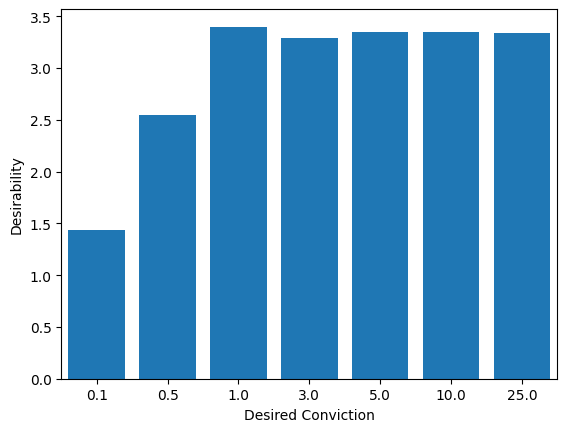

In [9]:
sns.barplot(data=final_result, x="Desired Conviction", y="Desirability", facecolor="tab:blue")

# Privacy Threshold

When `privacy_override` is not set to  <strong>True</strong>, the `new_case_threshold` can be adjusted to change the distance metric used for the privacy cutoff. This can have an effect on privacy, accuracy, and speed. The available metrics are:

- <strong>"min"</strong>: The minimum distance in the original local model space between any two cases. This provides the maximum accuracy while maintaining sufficient privacy.

- <strong>"max"</strong>: The maximum distance in the original local model space between any two cases. This method offers the maximum privacy. However, it comes at the cost of accuracy and sometimes performance.

- <strong>"most_similar"</strong>: The distance between the closest case in the local model space to it's closest case. This method provides privacy and accuracy results in between those of the minimum and maximum options described above, however it often has performance advantages for the level of privacy.


In [10]:
hyperparameters = None
desired_convictions = [5, 25]
for d in desired_convictions:
    with Synthesizer(privacy_override=True, use_id_privacy=False) as s:
        s.train(df, features=features)
        hyperparameters = s.hyperparams
        # Train the given dataset
        gen_df = s.synthesize_cases(n_samples=df.shape[0], 
                                    desired_conviction=d, 
                                    generate_new_cases='no'
                                   )
        gen_df.to_csv(f'synthesized_data_for_wastewater_clinical_tradeoff_c{d}.csv', index=False)


nih_age Int64 21 90
nih_height Int64 48 80
nih_weight Int64 79 500
patient_stay_length Int64 0 151


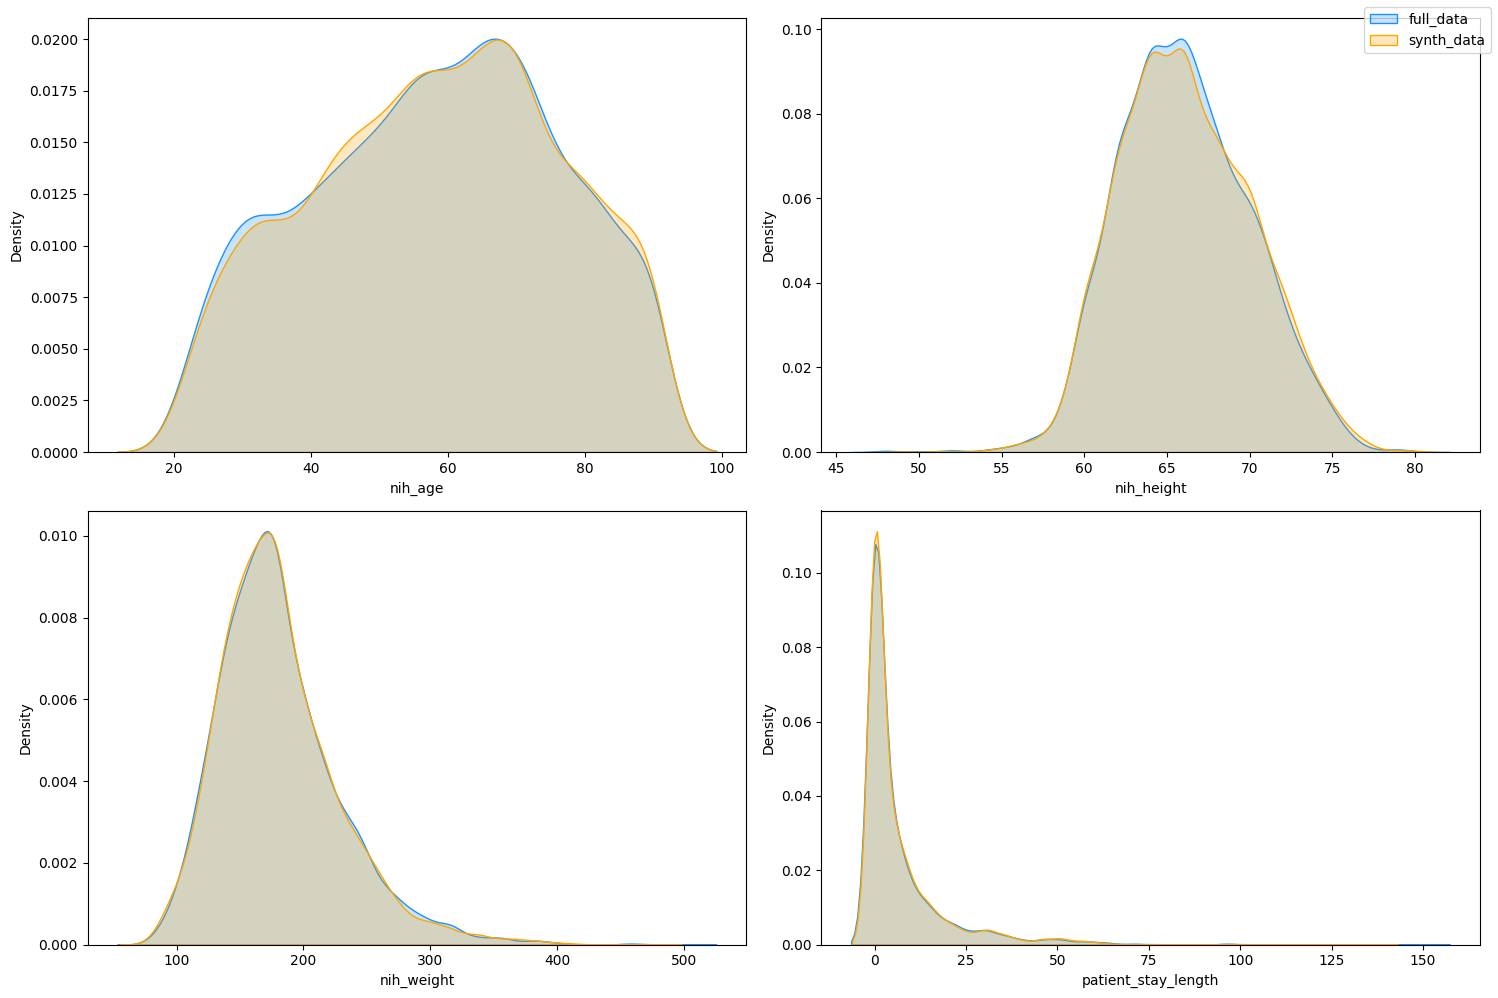

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
categorical_features = [f for f, a in features.items() if a["type"] in ("nominal", "ordinal")]

gen_df = pd.read_csv('synthesized_data_for_wastewater_clinical_tradeoff_c5.csv', dtype=col_type_mapping)

for c, ax in zip(df.columns.drop(categorical_features), axes.flat):    
    print(c, df[c].dtypes, df[c].min(), df[c].max())
    if df[c].dtypes != 'string':
        sns.kdeplot(ax=ax, x=df[c], color="dodgerblue", label="full_data", fill=True)
        sns.kdeplot(ax=ax, x=gen_df[c], color="orange", label="full_data", fill=True)
        ax.set_xlabel(c)

fig.legend(labels=["full_data", "synth_data"])
fig.tight_layout()
plt.show()

nih_age Int64 21 90
nih_height Int64 48 80
nih_weight Int64 79 500
patient_stay_length Int64 0 151


<Figure size 640x480 with 0 Axes>

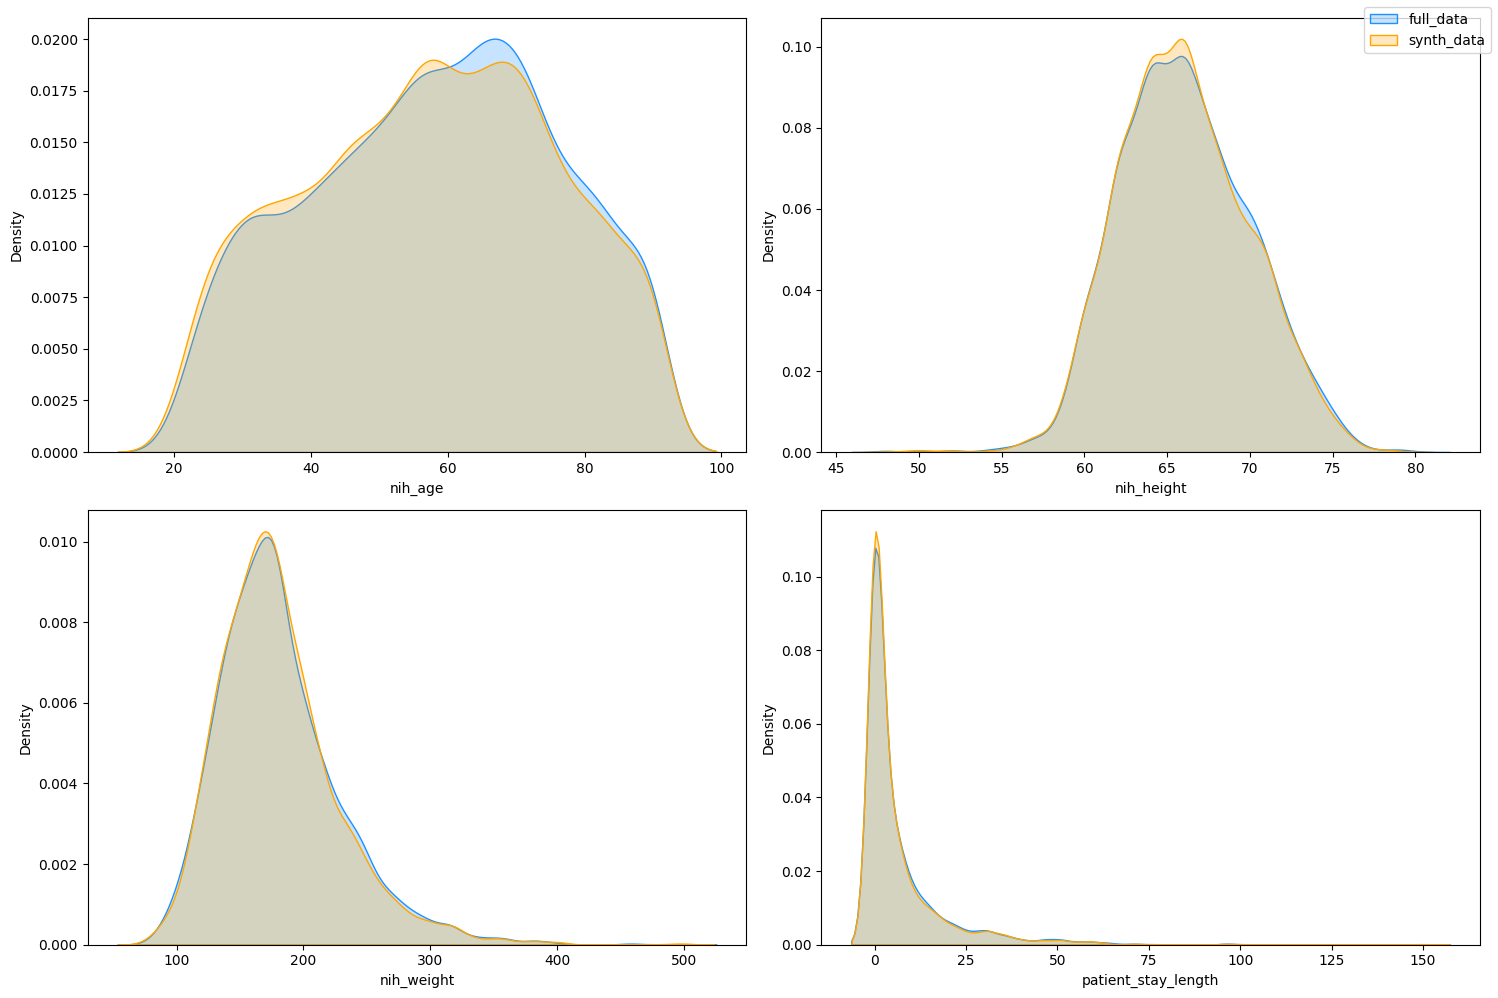

In [12]:
plt.clf()
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
categorical_features = [f for f, a in features.items() if a["type"] in ("nominal", "ordinal")]

gen_df = pd.read_csv('synthesized_data_for_wastewater_clinical_tradeoff_c25.csv', dtype=col_type_mapping)

for c, ax in zip(df.columns.drop(categorical_features), axes.flat):    
    print(c, df[c].dtypes, df[c].min(), df[c].max())
    if df[c].dtypes != 'string':
        sns.kdeplot(ax=ax, x=df[c], color="dodgerblue", label="full_data", fill=True)
        sns.kdeplot(ax=ax, x=gen_df[c], color="orange", label="full_data", fill=True)
        ax.set_xlabel(c)

fig.legend(labels=["full_data", "synth_data"])
fig.tight_layout()
plt.show()